# Part 2: Full Data Workflow A-Z

## Cleaning Data

### First Inspection / Handling inconsistent Data 

In [1]:
import pandas as pd

#### Titanic Dataset

In [2]:
titanic = pd.read_csv("titanic_imp.csv")

In [3]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [4]:
titanic.tail()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [ ]:
titanic.describe()

In [ ]:
titanic.describe(include ="O")

In [ ]:
titanic.Survived.unique()

In [ ]:
titanic.Survived.value_counts()

In [ ]:
titanic.Survived.replace(to_replace= ["yes", "no"], value = [1, 0], inplace = True)

In [ ]:
titanic.Survived.value_counts()

#### Olympic Dataset

In [ ]:
summer = pd.read_csv("summer_imp.csv")

In [ ]:
summer.head()

In [ ]:
summer.tail()

In [ ]:
summer.info()

In [ ]:
#summer.Athlete_Name

In [ ]:
summer.rename(columns = {"Athlete Name": "Athlete_Name"}, inplace = True)

In [ ]:
summer.head(20)

In [ ]:
summer.Medal.value_counts()

In [ ]:
summer.Medal.replace(to_replace= "Gold Medal", value = "Gold", inplace = True)

In [ ]:
summer.describe(include = "O")

### String Operations

#### Titanic Dataset

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
#pd.to_numeric(titanic.Fare)

In [ ]:
titanic.Fare = titanic.Fare.str.replace("$", "")

In [ ]:
titanic.Fare.head()

#### Olympic Dataset

In [ ]:
summer.head(20)

In [ ]:
summer.info()

In [ ]:
summer.Athlete_Name = summer.Athlete_Name.str.title()

In [ ]:
summer.head(10)

In [ ]:
summer.loc[summer.Athlete_Name.str.contains("Hajos")]

In [ ]:
summer.iloc[0, 4]

In [ ]:
summer.Athlete_Name = summer.Athlete_Name.str.strip()

In [ ]:
summer.loc[summer.Athlete_Name == "Hajos, Alfred"]

In [ ]:
summer.loc[summer.Athlete_Name == "Phelps, Michael"]

### Changing DataType with astype() / pd.to_numeric

#### Titanic Dataset

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
pd.to_numeric(titanic.Fare)

In [ ]:
titanic.Fare.astype("float")

In [ ]:
titanic["Fare"] = titanic.Fare.astype("float")

In [ ]:
titanic["Survived"] = titanic.Survived.astype("int")

In [ ]:
#titanic["Age"] = titanic.Age.astype("float")

In [ ]:
titanic.info()

In [ ]:
titanic.head()

#### Olympic Dataset

In [ ]:
summer.head()

In [ ]:
summer.info()

### Intro to NA Values

In [6]:
import numpy as np

In [7]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [8]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27,15,NaN,33
Mike,45,9,74,87.0,12
Andi,17,33,54,8.0,29
Paul,87,67,27,45.0,7


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     4 non-null      int64  
 2   Wed     4 non-null      int64  
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 192.0+ bytes


In [10]:
sales.loc["Steven", "Thu"]

nan

In [11]:
sales.iloc[1,1] = None

In [12]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15,NaN,33
Mike,45,NaN,74,87.0,12
Andi,17,33.0,54,8.0,29
Paul,87,67.0,27,45.0,7


In [13]:
sales.iloc[2,2] = np.nan

In [14]:
sales

,Mon,Tue,Wed,Thu,Fri
Steven,34,27.0,15.0,NaN,33
Mike,45,NaN,74.0,87.0,12
Andi,17,33.0,NaN,8.0,29
Paul,87,67.0,27.0,45.0,7


In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Steven to Paul
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mon     4 non-null      int64  
 1   Tue     3 non-null      float64
 2   Wed     3 non-null      float64
 3   Thu     3 non-null      float64
 4   Fri     4 non-null      int64  
dtypes: float64(3), int64(2)
memory usage: 352.0+ bytes


#### Titanic Dataset

In [16]:
titanic.head(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN
5,0,3,male,Missing Data,0,0,$8.4583,Q,NaN
6,0,1,male,54.0,0,0,$51.8625,S,E
7,0,3,male,2.0,3,1,$21.075,S,NaN
8,1,3,female,27.0,0,2,$11.1333,S,NaN
9,1,2,female,14.0,1,0,$30.0708,C,NaN


In [17]:
titanic.tail(10)

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
884,0,3,male,25.0,0,0,$7.05,S,NaN
885,0,3,female,39.0,0,5,$29.125,Q,NaN
886,0,2,male,27.0,0,0,$13.0,S,NaN
887,1,1,female,19.0,0,0,$30.0,S,B
888,0,3,female,NaN,1,2,$23.45,S,NaN
889,1,1,male,26.0,0,0,$30.0,C,C
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN
893,0,3,male,36.0,0,0,$7.8958,S,NaN


In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       758 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [19]:
titanic.isna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
889,False,False,False,False,False,False,False,False,False
890,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,False,True
892,False,False,False,False,False,False,False,False,True


In [20]:
titanic.isna().sum(axis = 0)

Survived      0
Class         0
Gender        0
Age         136
SipSp         0
ParCh         0
Fare          0
Emb           2
Deck        691
dtype: int64

In [23]:
titanic.isna().any(axis = 1)

0       True
1      False
2       True
3      False
4       True
       ...  
889    False
890     True
891     True
892     True
893     True
Length: 894, dtype: bool

In [56]:
titanic[titanic.isna().any(axis = 1)]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
2,1,3,female,26.0,0,0,$7.925,S,NaN
4,0,3,male,35.0,0,0,$8.05,S,NaN
5,0,3,male,NaN,0,0,$8.4583,Q,NaN
7,0,3,male,2.0,3,1,$21.075,S,NaN
...,...,...,...,...,...,...,...,...,...
888,0,3,female,NaN,1,2,$23.45,S,NaN
890,0,3,male,32.0,0,0,$7.75,Q,NaN
891,0,2,male,24.0,0,0,$10.5,S,NaN
892,0,3,male,34.0,1,1,$14.4,S,NaN


In [50]:
titanic[titanic.Age.isna()]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
5,0,3,male,NaN,0,0,$8.4583,Q,NaN
17,1,2,male,NaN,0,0,$13.0,S,NaN
19,1,3,female,NaN,0,0,$7.225,C,NaN
26,0,3,male,NaN,0,0,$7.225,C,NaN
28,1,3,female,NaN,0,0,$7.8792,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,$7.2292,C,NaN
863,0,3,female,NaN,8,2,$69.55,S,NaN
868,0,3,male,NaN,0,0,$9.5,S,NaN
878,0,3,male,NaN,0,0,$7.8958,S,NaN


In [27]:
titanic.notna()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...
889,True,True,True,True,True,True,True,True,True
890,True,True,True,True,True,True,True,True,False
891,True,True,True,True,True,True,True,True,False
892,True,True,True,True,True,True,True,True,False


In [29]:
titanic.notna().sum(axis = 0)

Survived    894
Class       894
Gender      894
Age         758
SipSp       894
ParCh       894
Fare        894
Emb         892
Deck        203
dtype: int64

In [30]:
titanic.notna().all(axis = 0)

Survived     True
Class        True
Gender       True
Age         False
SipSp        True
ParCh        True
Fare         True
Emb         False
Deck        False
dtype: bool

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

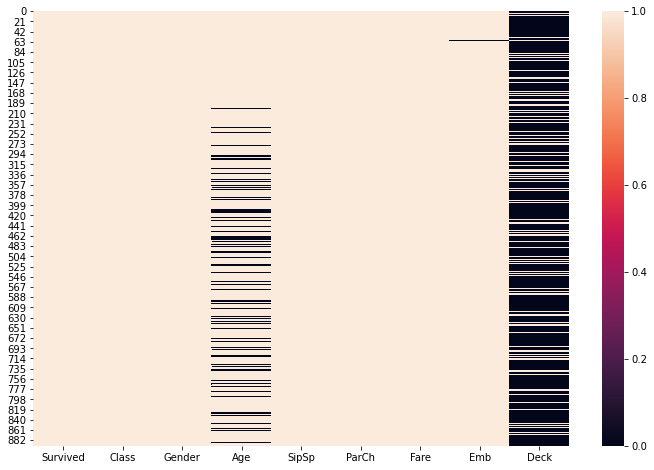

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(titanic.notna())
plt.show()

In [38]:
titanic.Age.value_counts(dropna = False)

NaN       177
24.00      31
22.00      27
18.00      26
30.00      25
         ... 
102.00      1
490.00      1
14.50       1
12.00       1
0.42        1
Name: Age, Length: 92, dtype: int64

In [42]:
titanic.Age.replace(to_replace= "Missing Data", value = np.nan, inplace= True)

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  894 non-null    object
 1   Class     894 non-null    int64 
 2   Gender    894 non-null    object
 3   Age       717 non-null    object
 4   SipSp     894 non-null    int64 
 5   ParCh     894 non-null    int64 
 6   Fare      894 non-null    object
 7   Emb       892 non-null    object
 8   Deck      203 non-null    object
dtypes: int64(3), object(6)
memory usage: 63.0+ KB


In [43]:
titanic.Age = titanic.Age.astype("float")

#### Olympic Dataset

In [45]:
summer.head()

NameError: name 'summer' is not defined

NameError: name 'summer' is not defined

In [ ]:
summer.info()

In [ ]:
summer[summer.isna().any(axis = 1)]

### Removing Missing Values with dropna()

#### Titanic Dataset

In [57]:
titanic.head()

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
0,0,3,male,22.0,1,0,$7.25,S,NaN
1,1,1,female,38.0,1,0,$71.2833,C,C
2,1,3,female,26.0,0,0,$7.925,S,NaN
3,1,1,female,35.0,1,0,$53.1,S,C
4,0,3,male,35.0,0,0,$8.05,S,NaN


In [58]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  894 non-null    object 
 1   Class     894 non-null    int64  
 2   Gender    894 non-null    object 
 3   Age       717 non-null    float64
 4   SipSp     894 non-null    int64  
 5   ParCh     894 non-null    int64  
 6   Fare      894 non-null    object 
 7   Emb       892 non-null    object 
 8   Deck      203 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 63.0+ KB


In [59]:
titanic[titanic.Emb.isna()]

,Survived,Class,Gender,Age,SipSp,ParCh,Fare,Emb,Deck
61,1,1,female,38.0,0,0,$80.0,NaN,B
829,1,1,female,62.0,0,0,$80.0,NaN,B


In [ ]:
titanic.Age.value_counts(dropna = False)

In [ ]:
titanic.Age.mean(skipna = True)

In [ ]:
titanic.shape

In [ ]:
titanic.dropna().shape

In [ ]:
titanic.dropna(axis = 0, how = "any").shape

In [ ]:
titanic.dropna(axis = 1, how = "any").shape

In [ ]:
titanic.dropna(axis = 0, how = "all").shape

In [ ]:
titanic.dropna(axis = 1, how = "all").shape

In [ ]:
titanic.dropna(axis = 0, thresh = 8).shape

In [ ]:
titanic.dropna(axis = 1, thresh = 500).shape

In [ ]:
titanic.dropna(axis = 1, thresh = 500, inplace = True)

In [ ]:
titanic.head()

In [ ]:
titanic.shape

In [ ]:
titanic.dropna(axis = 0, subset = ["Survived", "Class", "Gender", "Age"], how = "any").shape

#### Olympic Dataset

In [ ]:
summer.head()

In [ ]:
summer.info()

In [ ]:
summer[summer.isna().any(axis = 1)]

In [ ]:
summer.dropna(inplace = True)

In [ ]:
summer.info()

### Replacing Missing Values with fillna()

#### Titanic Dataset

In [ ]:
titanic.head(10)

In [ ]:
titanic.info()

In [ ]:
titanic.Age.mean()

In [ ]:
mean = round(titanic.Age.mean(),1)
mean

In [ ]:
titanic.Age.fillna(mean, inplace = True)

In [ ]:
titanic.head(6)

In [ ]:
titanic.info()

### Detection of Duplicates

In [ ]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [ ]:
alphabet

In [ ]:
alphabet.duplicated(keep = "first")

In [ ]:
alphabet[alphabet.duplicated(keep = "first")]

#### Titanic Dataset

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
titanic.duplicated(keep = "first", subset = ["Survived", "Class"]).sum()

In [ ]:
titanic[titanic.duplicated(keep = False)]

#### Olypmic Dataset

In [ ]:
summer.head()

In [ ]:
summer.info()

In [ ]:
summer.duplicated(keep = "first").sum()

In [ ]:
summer[summer.duplicated(keep = False)]

In [ ]:
summer.loc[(summer.Sport == "Basketball") & (summer.Year == 2012)]

### Handling / Removing Duplicates

#### Titanic Dataset

In [ ]:
titanic.tail()

In [ ]:
titanic.duplicated().sum()

In [ ]:
titanic[titanic.duplicated()]

In [ ]:
titanic.drop(index = [891, 892, 893], inplace = True)

In [ ]:
titanic.head()

In [ ]:
titanic.tail()

In [ ]:
titanic.info()

#### Olympic Dataset

In [ ]:
summer.head()

In [ ]:
summer[summer.duplicated(keep = False)]

In [ ]:
summer.drop(index = [2069, 12253, 15596, 21833, 28678], inplace = True)

In [ ]:
summer[summer.duplicated(keep = False)]

In [ ]:
summer.loc[16085:16110]

In [ ]:
summer.loc[29780:29795]

In [ ]:
alphabet[alphabet.duplicated(keep = False)]

In [ ]:
alphabet.drop_duplicates(inplace = True)

In [ ]:
alphabet

### The ignore_index parameter (NEW in Pandas 1.0)

In [ ]:
import pandas as pd

In [ ]:
alphabet = pd.DataFrame(["a", "b", "c", "c", "d", "e", "f", "g", "g", "g"], columns = ["Alphabet"])

In [ ]:
alphabet

In [ ]:
alphabet.drop_duplicates(ignore_index= True)

### Detection of Outliers

In [ ]:
titanic.head()

In [ ]:
titanic.describe()

In [ ]:
plt.figure(figsize = (12,6))
titanic.boxplot("Age")
plt.show()

In [ ]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

In [ ]:
titanic.Age.sort_values(ascending = False)

In [ ]:
titanic.loc[titanic.Age > 90]

In [ ]:
titanic.Fare.sort_values(ascending = False)

In [ ]:
plt.figure(figsize = (12,6))
titanic.Fare.plot()
plt.show()

### Handling / Removing Outliers

#### Titanic Dataset

In [ ]:
titanic.head()

In [ ]:
titanic.loc[titanic.Age > 90]

In [ ]:
index_outl  = titanic.loc[titanic.Age > 90].index

In [ ]:
index_outl

In [ ]:
titanic.loc[titanic.Age > 90, "Age"] = titanic.loc[titanic.Age > 90, "Age"]/10

In [ ]:
titanic.loc[index_outl]

In [ ]:
titanic.loc[217, "Age"] = 42.0

In [ ]:
plt.figure(figsize = (12,6))
titanic.Age.plot()
plt.show()

In [ ]:
titanic.info()

### Categorical Data

#### Titanic Dataset

In [ ]:
titanic.head()

In [ ]:
titanic.info()

In [ ]:
#titanic.to_csv("titanic_clean.csv", index = False)

In [ ]:
titanic.nunique()

In [ ]:
titanic[["Gender", "Emb"]].describe()

In [ ]:
titanic.Gender = titanic.Gender.astype("category")

In [ ]:
titanic.Emb = titanic.Emb.astype("category")

In [ ]:
titanic.info()

In [ ]:
titanic.Gender.dtype

#### Olympic Dataset

In [ ]:
summer.head()

In [ ]:
summer.info()

In [ ]:
#summer.to_csv("summer_clean.csv", index = False)

In [ ]:
summer.describe(include = ["O"])

In [ ]:
summer.nunique()

In [ ]:
summer.City = summer.City.astype("category")

In [ ]:
summer.Sport = summer.Sport.astype("category")

In [ ]:
summer.Discipline = summer.Discipline.astype("category")

In [ ]:
summer.Country = summer.Country.astype("category")

In [ ]:
summer.Gender = summer.Gender.astype("category")

In [ ]:
summer.Medal = summer.Medal.astype("category")

In [ ]:
summer.info()

### Pandas Version 1.0: NEW Dtypes and pd.NA 

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_csv("titanic.csv")

In [ ]:
titanic

In [ ]:
titanic.info()

In [ ]:
titanic = titanic.convert_dtypes()

In [ ]:
titanic

In [ ]:
titanic.info()

In [ ]:
titanic.iloc[0, -1]

In [ ]:
type(titanic.iloc[0, -1])

In [ ]:
pd.NA